In [55]:
import pandas as pd
import seaborn as sns

In [72]:
df_monthly_district = pd.read_csv("data/monthly_district_data.csv")
df_monthly_district.head()

,Unnamed: 0,Unnamed: 1,crime_crime_Aggravated Assault Firearm,crime_crime_Aggravated Assault No Firearm,crime_crime_All Other Offenses,crime_crime_Arson,crime_crime_Burglary Non-Residential,crime_crime_Burglary Residential,crime_crime_DRIVING UNDER THE INFLUENCE,crime_crime_Disorderly Conduct,...,traffic_stop_subject_sex_male,traffic_stop_type_pedestrian,traffic_stop_type_vehicular,traffic_stop_outcome_arrest,traffic_stop_outcome_none,traffic_stop_contraband_found,traffic_stop_frisk_performed,traffic_stop_search_conducted,traffic_stop_arrest_made,traffic_stop_total
0,1.0,2014-01-31,1.0,9.0,26.0,0.0,1.0,10.0,7.0,3.0,...,286.0,146.0,236.0,12.0,370.0,2.0,23.0,14.0,12.0,1579.0
1,1.0,2014-02-28,2.0,8.0,46.0,0.0,1.0,7.0,8.0,2.0,...,857.0,519.0,613.0,39.0,1093.0,12.0,65.0,40.0,39.0,4684.0
2,1.0,2014-03-31,3.0,10.0,83.0,1.0,1.0,6.0,6.0,5.0,...,760.0,481.0,512.0,28.0,965.0,10.0,63.0,29.0,28.0,4102.0
3,1.0,2014-04-30,5.0,8.0,78.0,1.0,3.0,10.0,7.0,3.0,...,1108.0,730.0,755.0,52.0,1433.0,14.0,101.0,49.0,52.0,6156.0
4,1.0,2014-05-31,1.0,12.0,55.0,0.0,1.0,11.0,4.0,6.0,...,1054.0,690.0,729.0,45.0,1374.0,14.0,102.0,50.0,45.0,5887.0


In [82]:
df_monthly_district = df_monthly_district[['crash_crash_MAX_SEVERITY_LEVEL_0',
 'crash_crash_MAX_SEVERITY_LEVEL_1',
 'crash_crash_MAX_SEVERITY_LEVEL_2',
 'crash_crash_MAX_SEVERITY_LEVEL_3',
 'crash_crash_MAX_SEVERITY_LEVEL_4',
 'crash_crash_MAX_SEVERITY_LEVEL_8',
 'crash_crash_MAX_SEVERITY_LEVEL_9',
 'crime_total',
 'traffic_stop_total',
 'crash_total']]

level = ['crash_crash_MAX_SEVERITY_LEVEL_0','crash_crash_MAX_SEVERITY_LEVEL_1','crash_crash_MAX_SEVERITY_LEVEL_2','crash_crash_MAX_SEVERITY_LEVEL_3','crash_crash_MAX_SEVERITY_LEVEL_4','crash_crash_MAX_SEVERITY_LEVEL_8','crash_crash_MAX_SEVERITY_LEVEL_9']
weights = [0,1,2,3,4,8,9]
df_monthly_district['crash_weighted_severity_level'] = sum([df_monthly_district[i]*j for i,j in zip(level, weights)])


<ipython-input-82-d44571b93f44>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_district['crash_weighted_severity_level'] = sum([df_monthly_district[i]*j for i,j in zip(level, weights)])


## Crime/Traffic Stop to The Severity Level of Car Crashes

Text(0.5, 1.0, 'No. of Traffic Stops to Severity Level of Car Crashes')

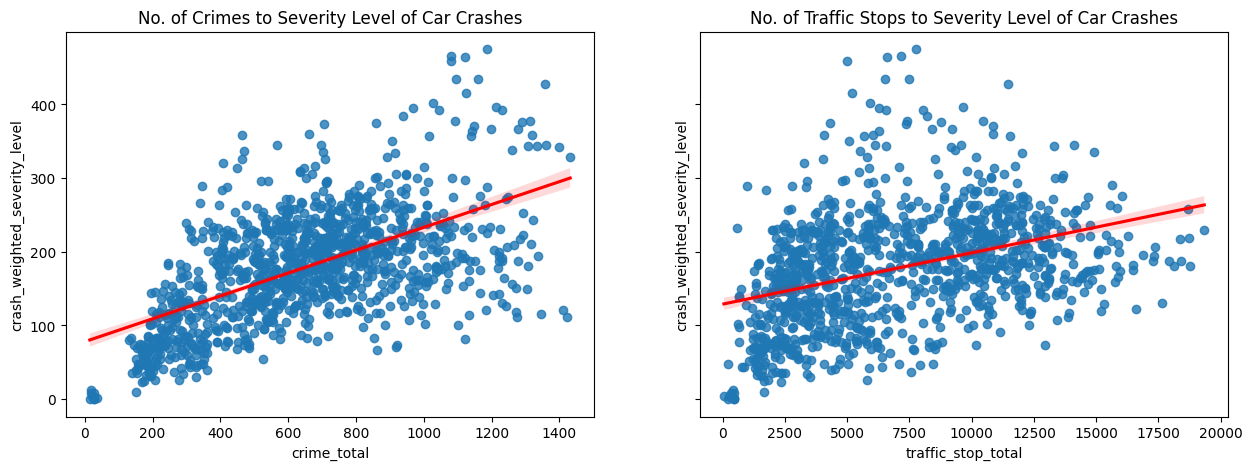

In [83]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.regplot(ax=axs[0], data=df_monthly_district, x="crime_total", y="crash_weighted_severity_level", line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df_monthly_district, x="traffic_stop_total", y="crash_weighted_severity_level", line_kws={'color': 'red'})
axs[0].set_title("No. of Crimes to Severity Level of Car Crashes")
axs[1].set_title("No. of Traffic Stops to Severity Level of Car Crashes")

In [130]:
from scipy.stats import pearsonr, spearsonr
corr0, p0 = spearsonr(df_monthly_district["crime_total"], df_monthly_district["crash_weighted_severity_level"])
corr1, p1 = spearsonr(df_monthly_district["traffic_stop_total"], df_monthly_district["crash_weighted_severity_level"])
print(f"No. of Crimes to the Severity Level of Car Crashes: ")
print(f"Perarson Coefficient: {round(corr0, 3)}        p-value: {p0}")
print(f"No. of Traffic Stops to the Severity Level of Car Crashes:")
print(f"Perarson Coefficient: {round(corr1, 3)}        p-value: {p1}")

ImportError: ignored

## Crime/Traffic Stop to The No. of Car Crashes

Text(0.5, 1.0, 'No. of Traffic Stops to No. of Car Crashes')

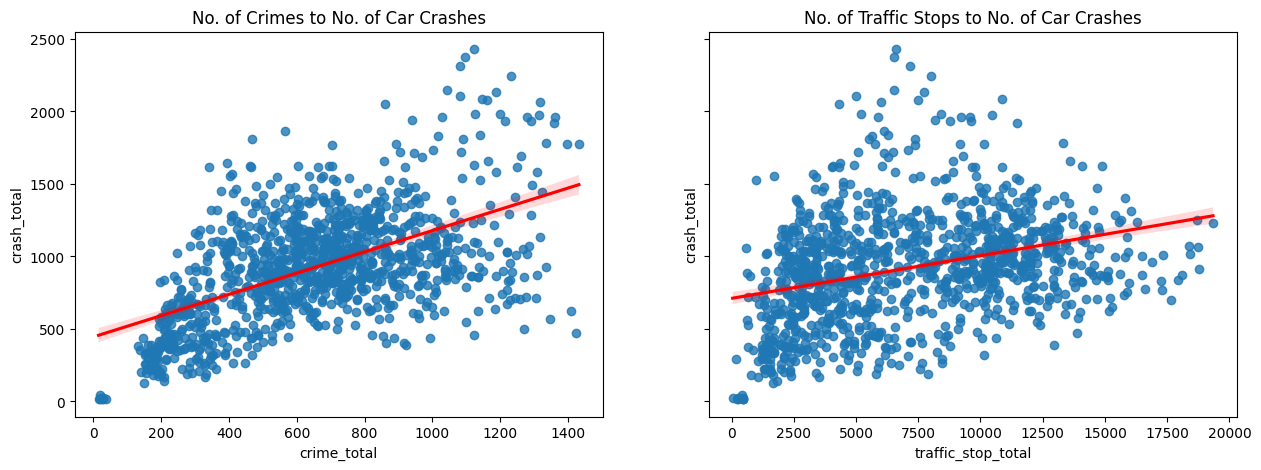

In [46]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.regplot(ax=axs[0], data=df_monthly_district, x="crime_total", y="crash_total", line_kws={'color': 'red'})
sns.regplot(ax=axs[1], data=df_monthly_district, x="traffic_stop_total", y="crash_total", line_kws={'color': 'red'})
axs[0].set_title("No. of Crimes to No. of Car Crashes")
axs[1].set_title("No. of Traffic Stops to No. of Car Crashes")

In [51]:
from scipy.stats import pearsonr
corr0, p0 = pearsonr(df_monthly_district["crime_total"], df_monthly_district["crash_total"])
corr1, p1 = pearsonr(df_monthly_district["traffic_stop_total"], df_monthly_district["crash_total"])
print(f"No. of Crimes to No. of Car Crashes: ")
print(f"Perarson Coefficient: {round(corr0, 3)}        p-value: {p0}")
print(f"No. of Traffic Stops to No. of Car Crashes:")
print(f"Perarson Coefficient: {round(corr1, 3)}        p-value: {p1}")

No. of Crimes to No. of Car Crashes: 
Perarson Coefficient: 0.555        p-value: 3.9156375782244206e-90
No. of Traffic Stops to No. of Car Crashes:
Perarson Coefficient: 0.321        p-value: 9.3984805873943e-28


In [103]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform
import numpy as np

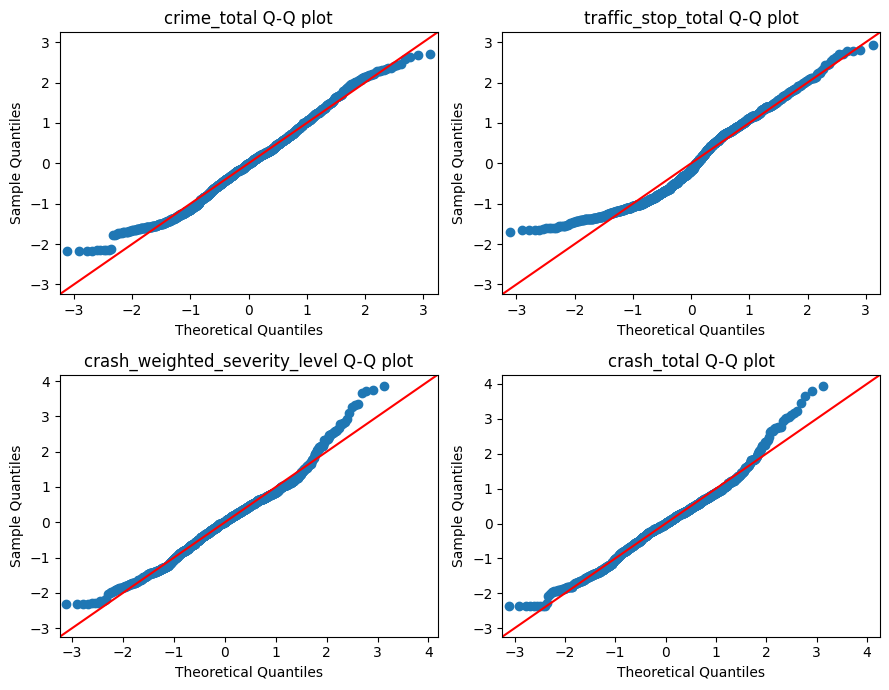

In [134]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7))
qqplot(df_monthly_district["crime_total"],norm,fit=True,line="45", ax=axs[0,0])
axs[0,0].set_title("crime_total Q-Q plot")
qqplot(df_monthly_district["traffic_stop_total"],norm,fit=True,line="45", ax=axs[0,1])
axs[0,1].set_title("traffic_stop_total Q-Q plot")
qqplot(df_monthly_district["crash_weighted_severity_level"],norm,fit=True,line="45", ax=axs[1,0])
axs[1,0].set_title("crash_weighted_severity_level Q-Q plot")
qqplot(df_monthly_district["crash_total"],norm,fit=True,line="45", ax=axs[1,1])
axs[1,1].set_title("crash_total Q-Q plot")
plt.tight_layout()
plt.show()